# L01

## Pre lab

Write a Python script that reads the income tier column of the customers.csv file and counts the number of high-income, mid-range, low-mid customers (there are 8000 customers – please don’t manually count this!) (see the appendix for an example code. Note that there are tons of pieces in the code that you do not need)

Modify the code to also read the battery capacity and calculate the average of car battery capacity for the high-income customers, mid-range income customers, and low-mid range customers. Create a bar graph representing this information.

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "./warsaw/customers.csv"
high_ct, mid_ct, lowmid_ct = (0, 0, 0)
high_bc_sum, mid_bc_sum, lowmid_bc_sum = (0, 0, 0)

with open(filename, mode="r", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header
    for row in reader:
        tier = row[1].strip()
        bat_cap = float(row[3].strip())
        if tier == "High":
            high_ct += 1
            high_bc_sum += bat_cap
        elif tier == "Mid-Range":
            mid_ct += 1
            mid_bc_sum += bat_cap
        elif tier == "Low-Mid":
            lowmid_ct += 1
            lowmid_bc_sum += bat_cap
        else:
            print(tier)  # anything i haven't accounted for?

print("customers")
print("high income customers: ", high_ct)
print("high battery capacity avg (kwh): ", high_bc_sum/high_ct)
print("low-mid income: ", lowmid_ct)
print("low-mid battery capacity avg (kwh): ", lowmid_bc_sum/lowmid_ct)
print("mid income: ", mid_ct)
print("mid battery capacity avg (kwh): ", mid_bc_sum/mid_ct)

customers
high income customers:  1190
high battery capacity avg (kwh):  85.65613445378101
low-mid income:  3990
low-mid battery capacity avg (kwh):  45.143558897242826
mid income:  2820
mid battery capacity avg (kwh):  70.76134751772918


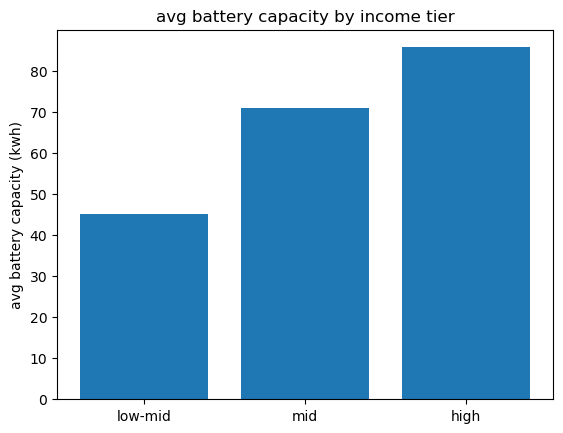

In [3]:
# graph
cats = ["low-mid", "mid", "high"]
avgs = [lowmid_bc_sum/lowmid_ct, mid_bc_sum/mid_ct, high_bc_sum/high_ct]

# plot
fig, ax = plt.subplots()

ax.bar(cats, avgs)

ax.set_ylabel('avg battery capacity (kwh)')
ax.set_title('avg battery capacity by income tier')

plt.show()